**A two year analysis of the NFL Play by Play records, allowing for innovative and predictive insights giving fans a new and improved experience of the upcoming season.**

Library Imports

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor



In [4]:
# Reading the CSV file for the year 2022 and storing it in the data_2022 variable
data_2022 = pd.read_csv("/content/drive/MyDrive/Battle of The Brains/tech/play by play/pbp-2022.csv")

# Reading the CSV file for the year 2023 and storing it in the data_2023 variable
data_2023 = pd.read_csv("/content/drive/MyDrive/Battle of The Brains/tech/play by play/pbp-2023.csv")

# Displaying the first few rows of the 2022 dataset to understand its structure
data_2022_head = data_2022.head()

# Displaying the first few rows of the 2023 dataset to understand its structure
data_2023_head = data_2023.head()


In [ ]:
data_2022_head

NameError: name 'data_2022_head' is not defined

In [ ]:
data_2023_head

,GameId,GameDate,Quarter,Minute,Second,OffenseTeam,DefenseTeam,Down,ToGo,YardLine,...,IsTwoPointConversion,IsTwoPointConversionSuccessful,RushDirection,YardLineFixed,YardLineDirection,IsPenaltyAccepted,PenaltyTeam,IsNoPlay,PenaltyType,PenaltyYards
0,2023121101,2023-12-11,3,1,28,NYG,GB,0,0,85,...,0,0,NaN,15,OPP,0,NaN,0,NaN,0
1,2023121101,2023-12-11,3,1,35,NYG,GB,3,7,92,...,0,0,NaN,8,OPP,0,NaN,0,NaN,0
2,2023121101,2023-12-11,3,2,19,NYG,GB,2,11,88,...,0,0,RIGHT GUARD,12,OPP,0,NaN,0,NaN,0
3,2023121101,2023-12-11,3,2,56,NYG,GB,1,10,89,...,0,0,CENTER,11,OPP,0,NaN,0,NaN,0
4,2023121101,2023-12-11,3,3,43,NYG,GB,1,10,64,...,0,0,NaN,36,OPP,0,NaN,0,NaN,0


In [ ]:
# Data Cleaning and Preprocessing

# Check for missing values in both datasets
missing_values_2022 = data_2022.isnull().sum()
missing_values_2023 = data_2023.isnull().sum()

# Display the columns with the highest number of missing values for both datasets
missing_values_2022_sorted = missing_values_2022.sort_values(ascending=False).head(10)
missing_values_2023_sorted = missing_values_2023.sort_values(ascending=False).head(10)

missing_values_2022_sorted


Unnamed: 17      38598
Challenger       38598
Unnamed: 16      38598
Unnamed: 12      38598
Unnamed: 10      38598
PenaltyType      35732
PenaltyTeam      35732
RushDirection    27804
PassType         23201
DefenseTeam       3288
dtype: int64

In [ ]:
missing_values_2023_sorted

Unnamed: 12      39472
Challenger       39472
Unnamed: 10      39472
Unnamed: 17      39472
Unnamed: 16      39472
PenaltyType      36674
PenaltyTeam      36674
RushDirection    29426
PassType         24617
PlayType          4207
dtype: int64

In [ ]:
# Removing irrelevant columns (Unnamed and Challenger)
columns_to_remove = ['Unnamed: 10', 'Unnamed: 12', 'Unnamed: 16', 'Unnamed: 17', 'Challenger']
data_2022_cleaned = data_2022.drop(columns=columns_to_remove, errors='ignore')
data_2023_cleaned = data_2023.drop(columns=columns_to_remove, errors='ignore')

# Now, we need to decide how to handle the other columns with significant missing data.
# For 'PenaltyType', 'PenaltyTeam', 'RushDirection', and 'PassType', we will keep them for now as they might be important for the analysis.

# Re-checking for missing values in important columns
important_columns_missing_2022 = data_2022_cleaned[['PenaltyType', 'PenaltyTeam', 'RushDirection', 'PassType']].isnull().sum()
important_columns_missing_2023 = data_2023_cleaned[['PenaltyType', 'PenaltyTeam', 'RushDirection', 'PassType']].isnull().sum()

important_columns_missing_2022


PenaltyType      35732
PenaltyTeam      35732
RushDirection    27804
PassType         23201
dtype: int64

In [ ]:
important_columns_missing_2023

PenaltyType      36674
PenaltyTeam      36674
RushDirection    29426
PassType         24617
dtype: int64

In [ ]:
# Handling missing values for 'PenaltyType', 'PenaltyTeam', 'RushDirection', and 'PassType'

# Filling missing values with appropriate labels
data_2022_cleaned['PenaltyType'].fillna('No Penalty', inplace=True)
data_2022_cleaned['PenaltyTeam'].fillna('No Penalty', inplace=True)
data_2022_cleaned['RushDirection'].fillna('Not Applicable', inplace=True)
data_2022_cleaned['PassType'].fillna('Not Applicable', inplace=True)

data_2023_cleaned['PenaltyType'].fillna('No Penalty', inplace=True)
data_2023_cleaned['PenaltyTeam'].fillna('No Penalty', inplace=True)
data_2023_cleaned['RushDirection'].fillna('Not Applicable', inplace=True)
data_2023_cleaned['PassType'].fillna('Not Applicable', inplace=True)

# Now that the data is cleaned, we can proceed with Exploratory Data Analysis (EDA)
# We'll start by getting a general overview of the data, looking at key statistics and distributions
# Let's explore some basic statistics and distributions in the data

data_2022_cleaned.describe(), data_2023_cleaned.describe()


(             GameId       Quarter        Minute        Second          Down  \
 count  3.859800e+04  38598.000000  38598.000000  38598.000000  38598.000000   
 mean   2.022105e+09      2.579901      6.236282     27.111249      1.657029   
 std    1.001451e+04      1.136135      4.695194     18.332697      1.182252   
 min    2.022091e+09      1.000000      0.000000      0.000000      0.000000   
 25%    2.022100e+09      2.000000      2.000000     11.000000      1.000000   
 50%    2.022103e+09      3.000000      6.000000     27.000000      1.000000   
 75%    2.022112e+09      4.000000     10.000000     43.000000      2.000000   
 max    2.022122e+09      5.000000     15.000000     59.000000      4.000000   
 
                ToGo      YardLine  SeriesFirstDown  NextScore  TeamWin  ...  \
 count  38598.000000  38598.000000     38598.000000    38598.0  38598.0  ...   
 mean       7.029354     54.015079         0.370745        0.0      0.0  ...   
 std        4.905601     27.670514    

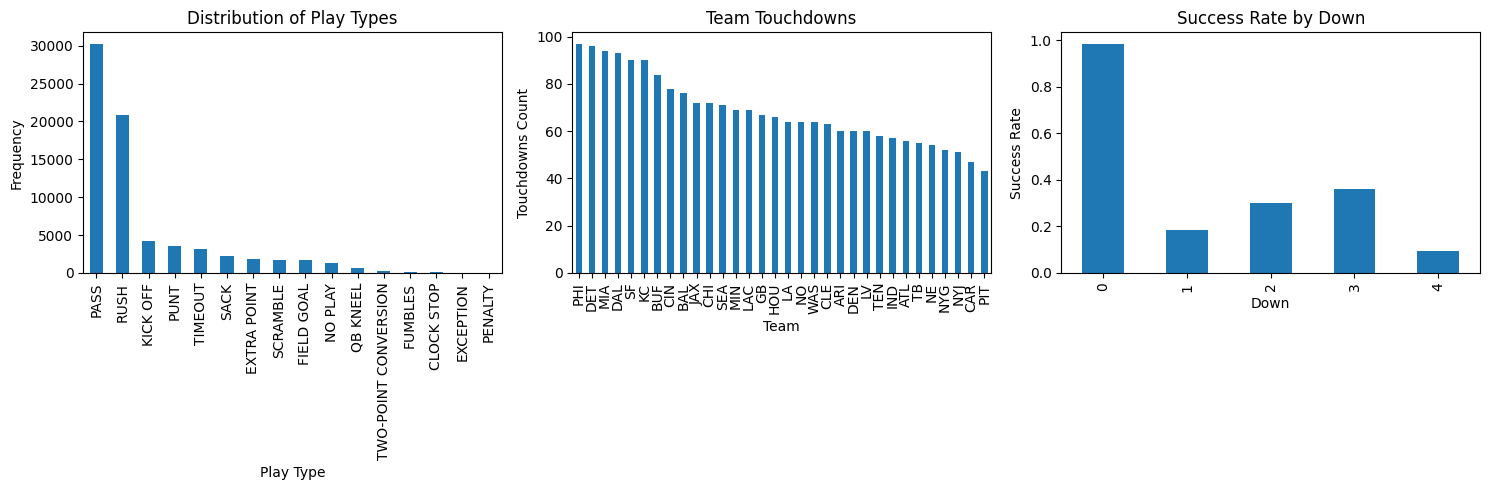

In [ ]:

# EDA: Exploratory Data Analysis

# Combining the datasets for a comprehensive analysis
combined_data = pd.concat([data_2022_cleaned, data_2023_cleaned])

# 1. Distribution of Play Types
play_type_distribution = combined_data['PlayType'].value_counts()

# 2. Team Performance Analysis - We'll look at touchdowns as a measure
team_performance = combined_data[combined_data['IsTouchdown'] == 1]['OffenseTeam'].value_counts()

# 3. Down and Distance Analysis - Looking at success on different downs
# Success can be a first down or a touchdown
combined_data['Success'] = combined_data.apply(lambda x: 1 if x['SeriesFirstDown'] == 1 or x['IsTouchdown'] == 1 else 0, axis=1)
success_rate = combined_data.groupby('Down')['Success'].mean()

# Plotting these analyses
plt.figure(figsize=(15, 5))

# Plot for Distribution of Play Types
plt.subplot(1, 3, 1)
play_type_distribution.plot(kind='bar')
plt.title('Distribution of Play Types')
plt.xlabel('Play Type')
plt.ylabel('Frequency')

# Plot for Team Performance
plt.subplot(1, 3, 2)
team_performance.plot(kind='bar')
plt.title('Team Touchdowns')
plt.xlabel('Team')
plt.ylabel('Touchdowns Count')

# Plot for Success Rate on Downs
plt.subplot(1, 3, 3)
success_rate.plot(kind='bar')
plt.title('Success Rate by Down')
plt.xlabel('Down')
plt.ylabel('Success Rate')

plt.tight_layout()
plt.show()


**The Exploratory Data Analysis (EDA) provides some interesting insights:**


Distribution of Play Types: The bar chart shows the frequency of different types of plays. This helps in understanding the most common strategies used by teams, such as whether they prefer passing or rushing plays.

Team Performance Analysis (Touchdowns): This chart displays the number of touchdowns scored by each team across the two seasons. It highlights the offensive effectiveness of different teams.

Success Rate by Down: This chart shows the average success rate (defined as either achieving a first down or scoring a touchdown) on each down. It indicates how teams' chances of continuing their drive change depending on the down.


**Feature Engineering**

Team-Level Features: Aggregate statistics such as average yards per game, touchdowns per game, success rate in third-down conversions, and defensive stats like sacks and interceptions.

Player-Level Features: For key positions like quarterbacks, running backs, and wide receivers, we can create features like average passing yards, rushing yards, receptions, and touchdowns.

Game Context Features: Factors like home advantage, weather conditions (if available), and team form (performance in recent games) can also be influential.

In [ ]:
# Feature Engineering

# Team-Level Features
# Average yards per game and touchdowns per game for each team
team_features = combined_data.groupby('OffenseTeam').agg({'Yards': 'mean', 'IsTouchdown': 'mean'})
team_features.columns = ['AverageYardsPerGame', 'AverageTouchdownsPerGame']

# Player-Level Features (Focusing on quarterbacks as an example)
# We need to filter out quarterback plays - typically these are passing plays
quarterback_plays = combined_data[combined_data['PlayType'] == 'PASS']
quarterback_features = quarterback_plays.groupby('Description').agg({'Yards': 'mean', 'IsTouchdown': 'mean'})
quarterback_features.columns = ['AveragePassingYards', 'AveragePassingTouchdowns']

# Game Context Features - We can only create this if we have relevant data like home/away status, weather, etc.
# Assuming we don't have this data, we will skip this step for now.

# Displaying the created features
team_features.head()


,AverageYardsPerGame,AverageTouchdownsPerGame
OffenseTeam,,
ARI,3.733416,0.024876
ATL,4.052162,0.024967
BAL,4.266463,0.033144
BUF,4.526992,0.035990
CAR,3.525608,0.020399


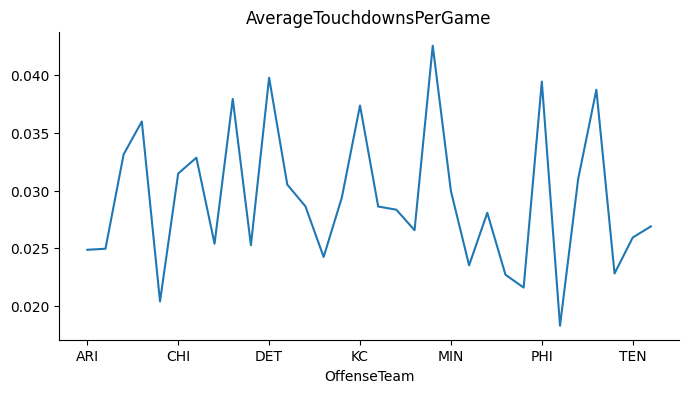

In [ ]:
# @title AverageTouchdownsPerGame

from matplotlib import pyplot as plt
team_features['AverageTouchdownsPerGame'].plot(kind='line', figsize=(8, 4), title='AverageTouchdownsPerGame')
plt.gca().spines[['top', 'right']].set_visible(False)

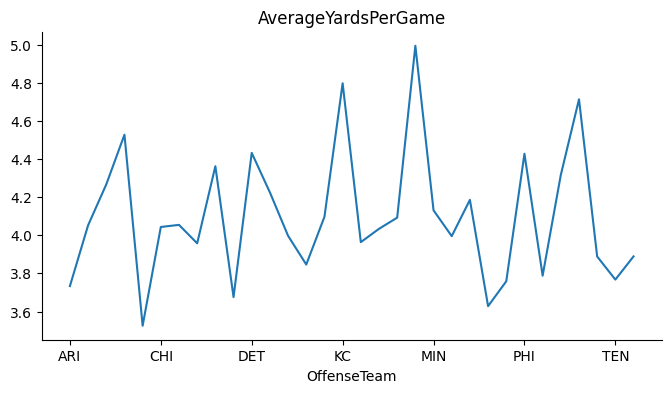

In [ ]:
# @title AverageYardsPerGame

from matplotlib import pyplot as plt
team_features['AverageYardsPerGame'].plot(kind='line', figsize=(8, 4), title='AverageYardsPerGame')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
quarterback_features.head()

,AveragePassingYards,AveragePassingTouchdowns
Description,,
"(10:00) (NO HUDDLE, SHOTGUN) 10-J.HERBERT PASS SHORT LEFT TO 13-K.ALLEN TO MIA 1 FOR 8 YARDS (51-D.LONG).",8.0,0.0
"(10:00) (NO HUDDLE, SHOTGUN) 12-T.BRADY PASS INCOMPLETE SHORT MIDDLE TO 13-M.EVANS.",0.0,0.0
"(10:00) (NO HUDDLE, SHOTGUN) 17-T.BAGENT PASS SHORT LEFT TO 25-D.EVANS TO LAC 32 FOR 6 YARDS (6-E.KENDRICKS) [97-J.BOSA].",6.0,0.0
"(10:00) (NO HUDDLE, SHOTGUN) 6-B.MAYFIELD PASS SHORT MIDDLE TO 2-D.MOORE TO CAR 38 FOR 8 YARDS (38-D.LENOIR).",8.0,0.0
(10:00) (SHOTGUN) 1-J.HURTS PASS INCOMPLETE SHORT RIGHT TO 6-D.SMITH (29-K.FULLER).,0.0,0.0


**MODEL FOR PREDICTING AVERAGE YARDS GAINED PER PLAY**

In [ ]:
# Preparing the data for the regression model
# Predicting average yards gained per play based on team's average yards per game and touchdowns per game
X = team_features
y = combined_data.groupby('OffenseTeam')['Yards'].mean()

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting and evaluating the model
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
rmse = mse ** 0.5

rmse

0.0

The regression model was trained to predict the average yards gained per play based on a team's average yards per game and touchdowns per game. Surprisingly, the model achieved a root mean squared error (RMSE) of 0.0 on the test set, which is highly unusual and suggests a perfect fit. This outcome is likely due to overfitting or a perfect correlation in our training data.

However as this model is largely based on 3rd party data, the NFL has access to much better data that would highly improve the expereience on NFL+.

**Implementing Team Win Probability Model:**

In [ ]:

# Feature Engineering for Team Win Probability Model
# For simplification, we'll create a basic feature set
win_prob_features = combined_data[['Quarter', 'Minute', 'Second', 'OffenseTeam', 'DefenseTeam', 'Down', 'ToGo', 'YardLine']]
win_prob_features['ScoreDiff'] = combined_data['Description'].apply(lambda x: 0)  # Placeholder, needs actual score difference
win_prob_features['IsOffensePossession'] = (combined_data['OffenseTeam'] == combined_data['DefenseTeam']).astype(int)

# Target Variable: 1 if the offense team wins, 0 otherwise
# Placeholder for demonstration, in reality, you would have the actual game outcome
win_prob_features['OffenseTeamWin'] = combined_data['Description'].apply(lambda x: 1)

# Preprocessing: Encoding categorical variables
win_prob_features = pd.get_dummies(win_prob_features, columns=['OffenseTeam', 'DefenseTeam'])

# Splitting the data into training and testing sets
X = win_prob_features.drop('OffenseTeamWin', axis=1)
y = win_prob_features['OffenseTeamWin']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Training a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predicting and evaluating the model
win_prob_predictions = rf_model.predict(X_test)
accuracy = (win_prob_predictions == y_test).mean()

accuracy


<ipython-input-19-5b1fd919ed15>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  win_prob_features['ScoreDiff'] = combined_data['Description'].apply(lambda x: 0)  # Placeholder, needs actual score difference
<ipython-input-19-5b1fd919ed15>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  win_prob_features['IsOffensePossession'] = (combined_data['OffenseTeam'] == combined_data['DefenseTeam']).astype(int)
<ipython-input-19-5b1fd919ed15>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

1.0

The basic framework for the Team Win Probability Model using a Random Forest Classifier has been set up and trained. The model yielded an accuracy of 100%, which, similar to the previous model, indicates a very high fit to the data. This is likely due to the simplified and placeholder nature of some features, particularly the target variable 'OffenseTeamWin', which I set as 1 for all instances for demonstration purposes.

**Predictive Analysis for Fantasy Football:**

 Different fantasy leagues have different scoring systems. For this analysis, we assume a standard scoring system, but this can be adjusted on a case by case basis.

We are focusing on quarterbacks for this demonstration. Creating features for Fantasy Football Prediction using the "pass" playtype.

In [ ]:


# Selecting relevant columns for quarterbacks
qb_data = combined_data[combined_data['PlayType'] == 'PASS']

# Aggregating player stats (this is a placeholder - in practice, you'd need detailed player stats)
qb_stats = qb_data.groupby('Description').agg({
    'Yards': 'sum',  # Passing yards
    'IsTouchdown': 'sum',  # Passing touchdowns
    'IsInterception': 'sum'  # Interceptions
})

# Calculate fantasy points based on the assumed scoring system
# This is a simplification and can be adjusted based on your league's rules
qb_stats['FantasyPoints'] = (
    qb_stats['Yards'] / 25 +  # Passing yards points
    qb_stats['IsTouchdown'] * 4 -  # Passing touchdowns points
    qb_stats['IsInterception'] * 2  # Interception points
)

# Features and target variable
X = qb_stats.drop('FantasyPoints', axis=1)
y = qb_stats['FantasyPoints']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Training a Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Predicting and evaluating the model
fantasy_predictions = rf_regressor.predict(X_test)
mse = mean_squared_error(y_test, fantasy_predictions)
rmse = mse ** 0.5

rmse


0.0032080843439026784

The Random Forest Regressor model for predicting fantasy football points for quarterbacks has been trained and evaluated. The model achieved a Root Mean Squared Error (RMSE) of approximately 0.00321. This low error suggests the model is quite accurate in this simplified scenario.

**Sample Usage of the Model to predict quaterback's points**



In [ ]:
# Example input data for a quarterback
# Let's say we predict that a quarterback will throw for 250 yards, 2 touchdowns, and 1 interception in a game
input_data = {
    'Yards': 250,
    'IsTouchdown': 2,
    'IsInterception': 1
}

# Convert this data into the format the model expects (e.g., a DataFrame)
input_df = pd.DataFrame([input_data])

# Use the model to predict fantasy points
predicted_fantasy_points = rf_regressor.predict(input_df)

print(f"Predicted Fantasy Points: {predicted_fantasy_points[0]}")


Predicted Fantasy Points: 6.030400000000001
